<a href="https://colab.research.google.com/github/UchihaItachi95/ML-Algorithms/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes
## The Naive Bayes classifier is a probabilistic classifier based on applying Bayes's theorem with strong (naive) independence assumptions between the features.

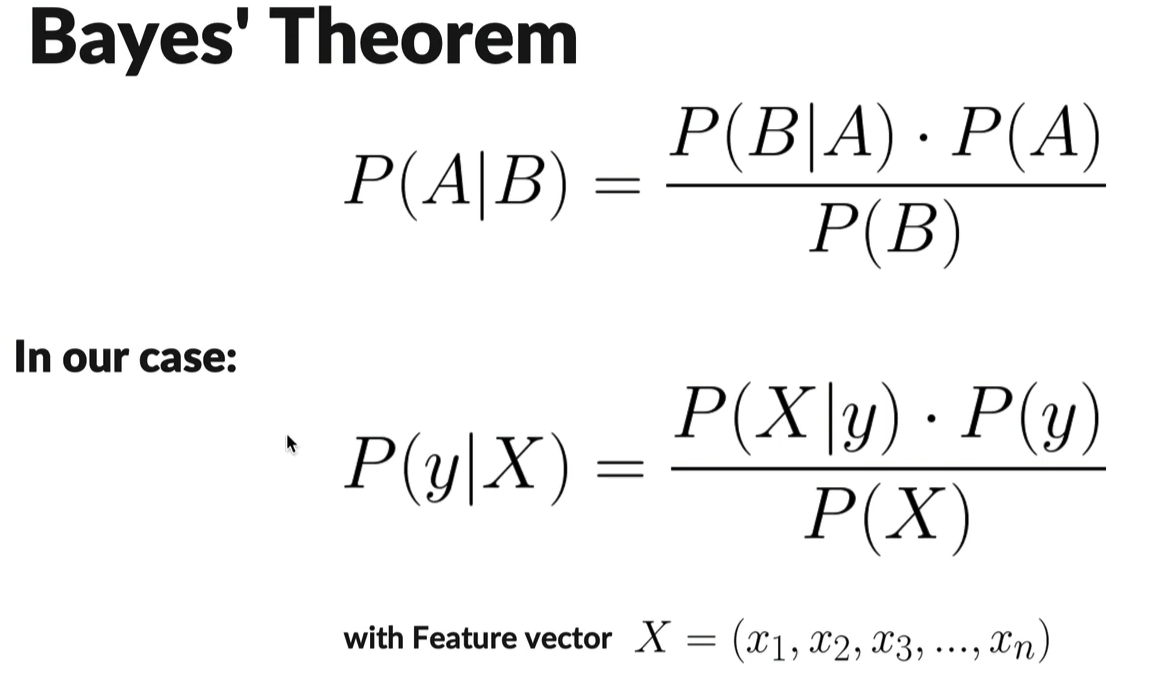

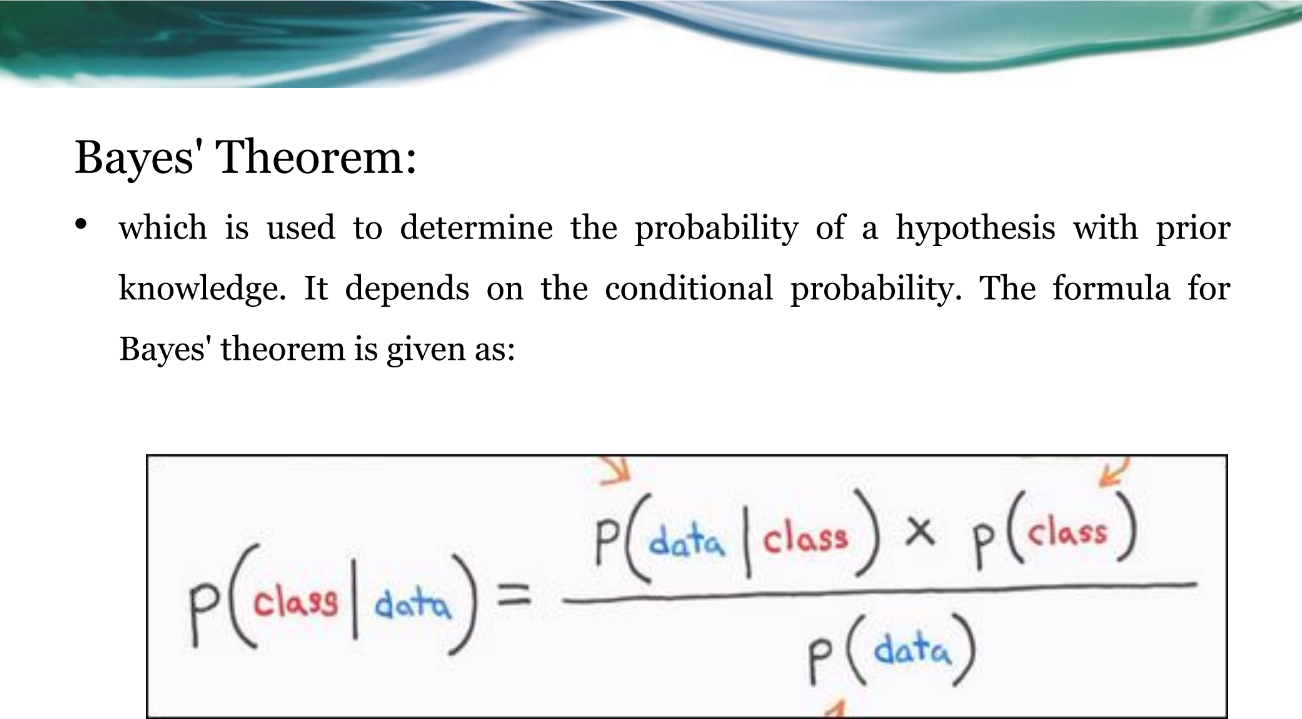

# We Assume the features are mutually independent
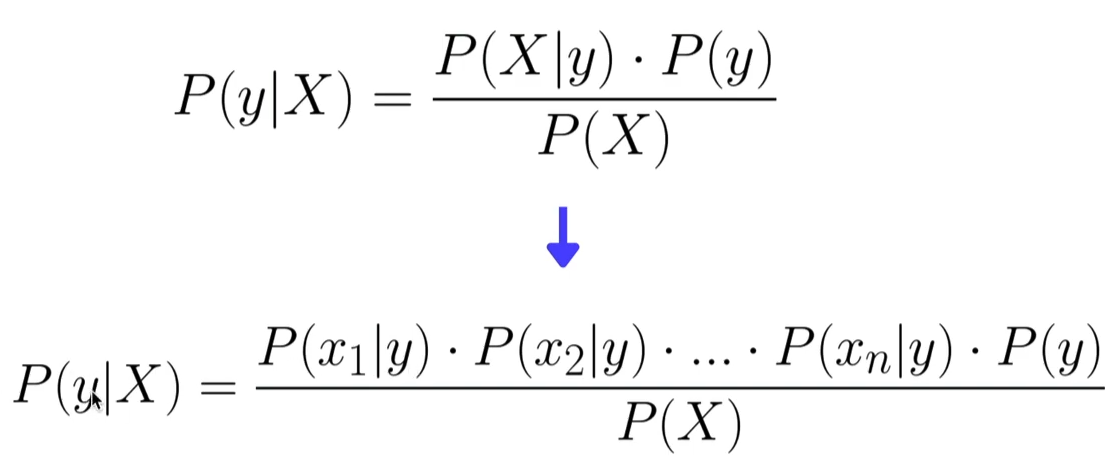
# x1, x2, x3 is features

# We want to select class with the highest posterior probability P(y|X) is called posterior
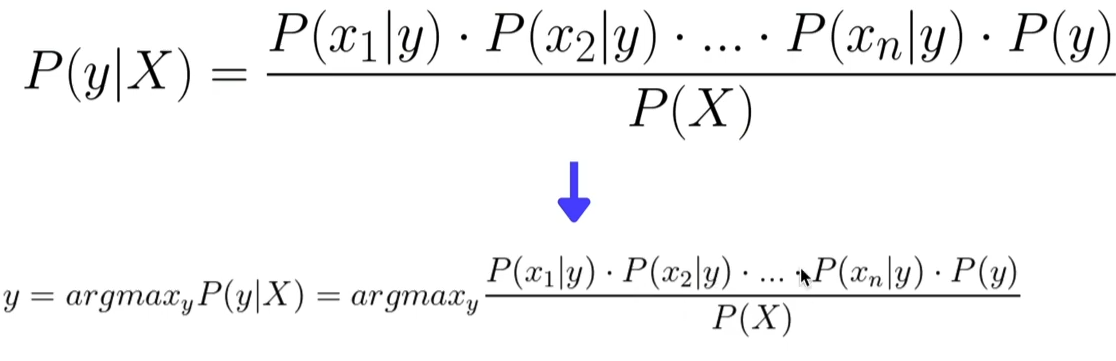
#  argmax function is a function that returns the argument that gives the maximum value from a target function. It is most commonly used in machine learning for finding the class with the largest predicted probability.

# We simplify this by removing P(X) because it isn't depend on y
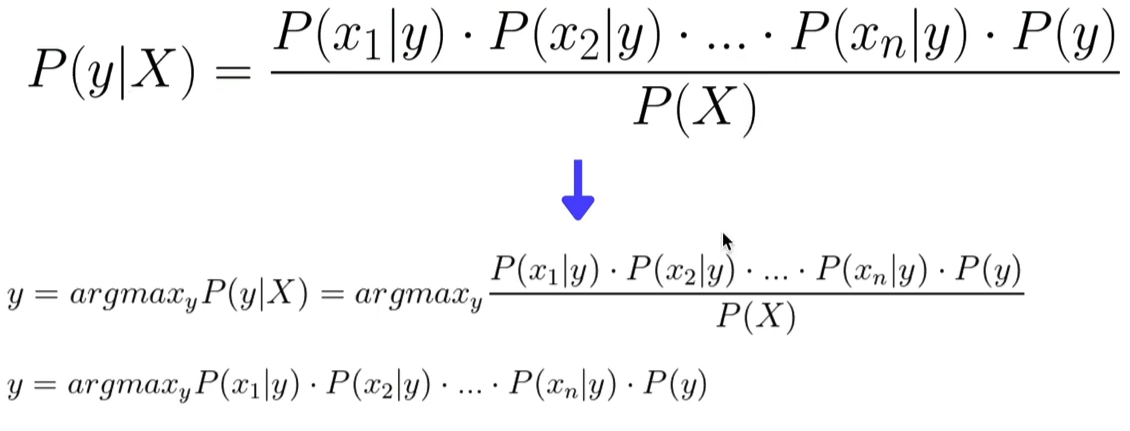


# The valuse between of probability[0, 1] and when we multibly them the value becomes very small and we run in accuracy error  so we apply the log
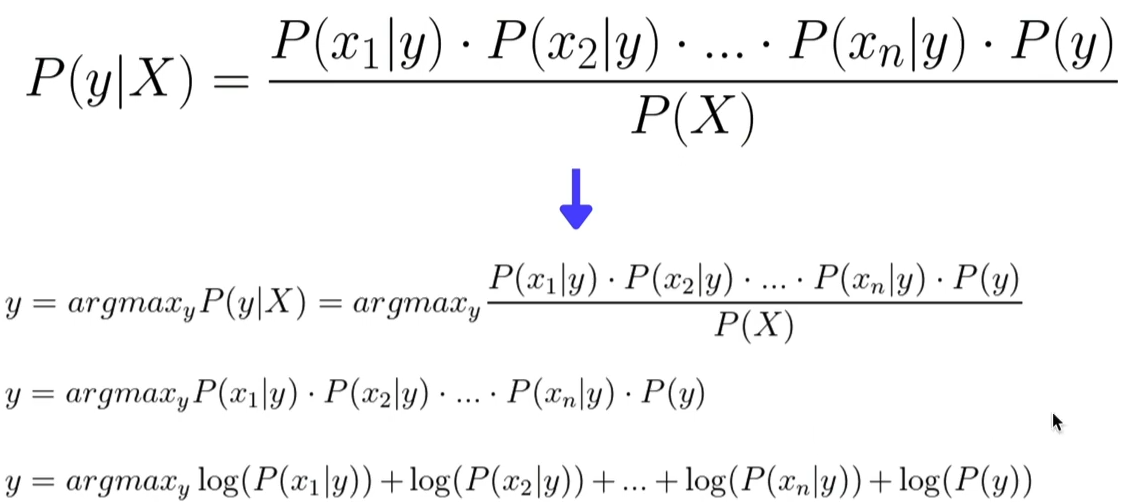
# We need to calculate P(y) and P(x|y)

# Prior and class conditional
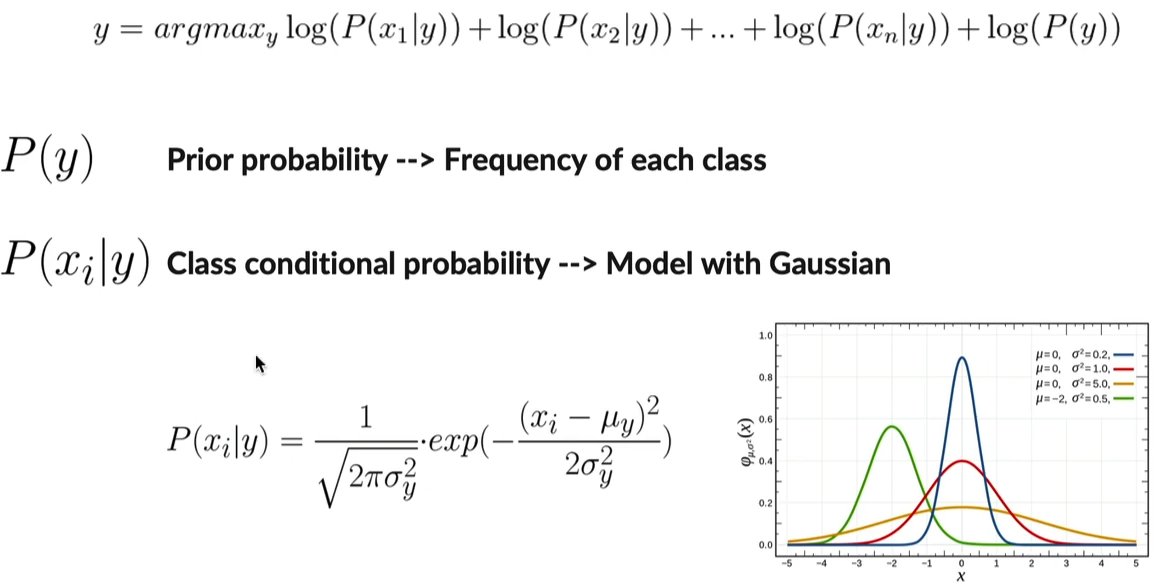

# Steps
## Training:
      . Calculate mean,var,and prior(frequency) for each class
## Predictions:
    .Calculate posterior for each class with
  
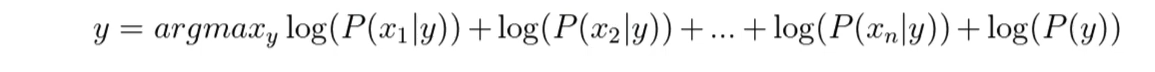  
# and Gaussian formula and Choose class with the highest poserior probability


In [ ]:
import numpy as np # NumPy library is used for numerical operations on arrays.

# Explaining the parameter axis in numpy


In [ ]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# np.sum(arr, axis=0) calculates the sum along the rows, resulting in the sums of the columns.
# 1+4+7 = 12, 2+5+8 = 15, 3+6+9 = 18
row_sum = np.sum(arr, axis=0)
print(row_sum)

[12 15 18]


In [ ]:
class NaiveBayes:
    """
    This is the fit method of the NaiveBayes class. It is used to train the classifier. It takes two arguments:

    X: A NumPy array containing the training data, where each row represents a sample and each column represents a feature.
    y: A NumPy array containing the corresponding class labels for the training data.
    """
    def fit(self, X, y):
        # calculating the number of samples and features in the training data.
        # X.shape : returns a tuple first element is the number of rows and the second one is the number of columns
        n_samples, n_features = X.shape
        """
        self._classes is an array that stores the unique class labels found in the y array. It is used to determine the classes for which the classifier will make predictions.
        n_classes stores the total number of unique classes in the dataset.
        """
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        """
        These lines initialize the internal variables used by the classifier:
        self._mean: A matrix to store the mean of each feature for each class.
        self._var: A matrix to store the variance of each feature for each class.
        self._priors: An array to store the prior probabilities of each class.
        """
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        # iterates over the unique class labels.
        for c in self._classes:
            # extracts the rows from the training data X that correspond to the current class c
            X_c= X[c==y]
            """
            calculate the mean and variance for each feature within the class c and store them in the _mean and _var arrays

            - In NumPy the axis parameter is commonly used in functions that operate on arrays to specify along which axis the operation should be performed.
            - When axis = 0  it means that the operation will be applied along the rows or the first axis of the array. This is typically used in functions that calculate statistics or perform operations column-wise
            """
            self._mean[c,:] = X_c.mean(axis=0)
            self._var[c, :] = X_c.var(axis=0)
            # calculates and stores the prior probability of class c by dividing the number of samples in class c by the total number of samples.
            self._priors[c] = X_c.shape[0] / float(n_samples)

    # predict method of the NaiveBayes class, which is used to make predictions. It takes a single argument X, which is a NumPy array containing the samples to be predicted.
    def predict(self, X):
        #  list comprehension to call the _predict method for each sample in X and stores the predicted class labels in y_pred.
        y_pred = [self._predict(x) for x in X ]
        # returns the list of predicted class labels.
        return y_pred


    #  takes a single sample x as an argument and returns the predicted class label for that sample.
    def _predict(self,x):
        # An empty list is created to store the posterior probabilities for each class.
        posteriors = []
        """
        The enumerate function in Python is a built-in function that is used to iterate over an iterable
        (such as a list, tuple, or string) while keeping track of the index (position) of the current item.
        It returns a tuple containing both the index and the item from the iterable.
        """
        # iterates over the unique class labels, and idx is an index that represents the current class.
        for idx, c in enumerate(self._classes):
            # calculates the log of the prior probability for the current class.
            prior = np.log(self._priors[idx])
            # the log of the class-conditional probability for the current class, which is obtained by summing the logs of the probabilities calculated by the _pdf method.
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            # The posterior probability is computed by adding the log prior and log class-conditional probability.
            posterior = prior + class_conditional
            # The posterior probability for the current class is added to the posteriors list.
            posteriors.append(posterior)
        # returns the class label with the highest posterior probability, which is determined using np.argmax.
        return self._classes[np.argmax(posteriors)]



    # method, which calculates the probability density function (PDF) for a given class and a sample x.
    def _pdf(self, class_idx, x):
        # extracts the mean and variance for the specified class.
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        # The numerator of the Gaussian PDF is computed using the formula for the Gaussian distribution.
        numerator = np.exp(-(x-mean)**2/(2 * var))
        # The denominator of the Gaussian PDF is calculated.
        denominator = np.sqrt(2* np.pi *var)
        """
        The PDF is computed as the ratio of the numerator and denominator
        representing the probability of observing the sample x given the class with mean and variance.
        """
        return numerator / denominator






# Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):

  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X, y = datasets.make_classification(
n_samples=1000, n_features=10, n_classes=2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=123
)

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965
